In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split


In [3]:
def create_dir_if_not_exists(path):
    if not os.path.exists(path):
        os.makedirs(path)

def split_and_copy_files(source_dir, dest_dirs, test_size=0.2, val_size=0.1):

    for class_name in os.listdir(source_dir):
        class_dir = os.path.join(source_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        files = os.listdir(class_dir)
        train_files, test_files = train_test_split(files, test_size=test_size, random_state=42)
        train_files, val_files = train_test_split(train_files, test_size=val_size / (1 - test_size), random_state=42)

        for phase, phase_files in zip(['train', 'test', 'val'], [train_files, test_files, val_files]):
            dest_class_dir = os.path.join(dest_dirs[phase], class_name)
            create_dir_if_not_exists(dest_class_dir)

            for file_name in phase_files:
                src_file = os.path.join(class_dir, file_name)
                dest_file = os.path.join(dest_class_dir, file_name)
                shutil.copy(src_file, dest_file)
                print(f"Copied {src_file} to {dest_file}")


In [4]:
source_directory = '/kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE'
destination_directories = {
        'train': 'train',
        'test': 'test',
        'val': 'validation'
    }

# Create destination directories if they do not exist
for key in destination_directories:
      create_dir_if_not_exists(destination_directories[key])

# Split and copy files
split_and_copy_files(source_directory, destination_directories)


Copied /kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0414-0001.jpeg to train/normal/NORMAL2-IM-0414-0001.jpeg
Copied /kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0567-0001.jpeg to train/normal/NORMAL2-IM-0567-0001.jpeg
Copied /kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/IM-0168-0001.jpeg to train/normal/IM-0168-0001.jpeg
Copied /kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0682-0001.jpeg to train/normal/NORMAL2-IM-0682-0001.jpeg
Copied /kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/IM-0025-0001.jpeg to train/normal/IM-0025-0001.jpeg
Copied /kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0974-0001.jpeg to train/normal/NORMAL2-IM-0974-0001.jpeg
Copied /kaggle/input/covid-cxr-image-dataset-research/COVID_IEEE/normal/NORMAL2-IM-0683-0001.jpeg to train/normal/NORMAL2-IM-0683-0001.jpeg
Copied /kaggle/input/covid-cxr-image-dataset-researc

In [5]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.38 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.3/8062.4 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
%cd /kaggle/working

!yolo task=classify mode=train model=yolov8m-cls.pt data='/kaggle/working' epochs=10 imgsz=224 #img size

/kaggle/working
100%|███████████████████████████████████████| 32.7M/32.7M [00:00<00:00, 201MB/s]
Ultralytics YOLOv8.2.38 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/kaggle/working, epochs=10, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sav

In [8]:
%cd /kaggle/working

!yolo task=classify mode=val model=/kaggle/working/runs/classify/train/weights/best.pt data='/kaggle/working'

/kaggle/working
Ultralytics YOLOv8.2.38 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 103 layers, 15766499 parameters, 0 gradients, 41.6 GFLOPs
train: /kaggle/working/train... found 1194 images in 3 classes ✅ 
val: /kaggle/working/validation... found 173 images in 3 classes ✅ 
test: /kaggle/working/test... found 341 images in 3 classes ✅ 
val: Scanning /kaggle/working/validation... 173 images, 0 corrupt: 100%|████████
               classes   top1_acc   top5_acc: 100%|██████████| 11/11 [00:02<00:0
                   all      0.977          1
Speed: 0.1ms preprocess, 2.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val
💡 Learn more at https://docs.ultralytics.com/modes/val


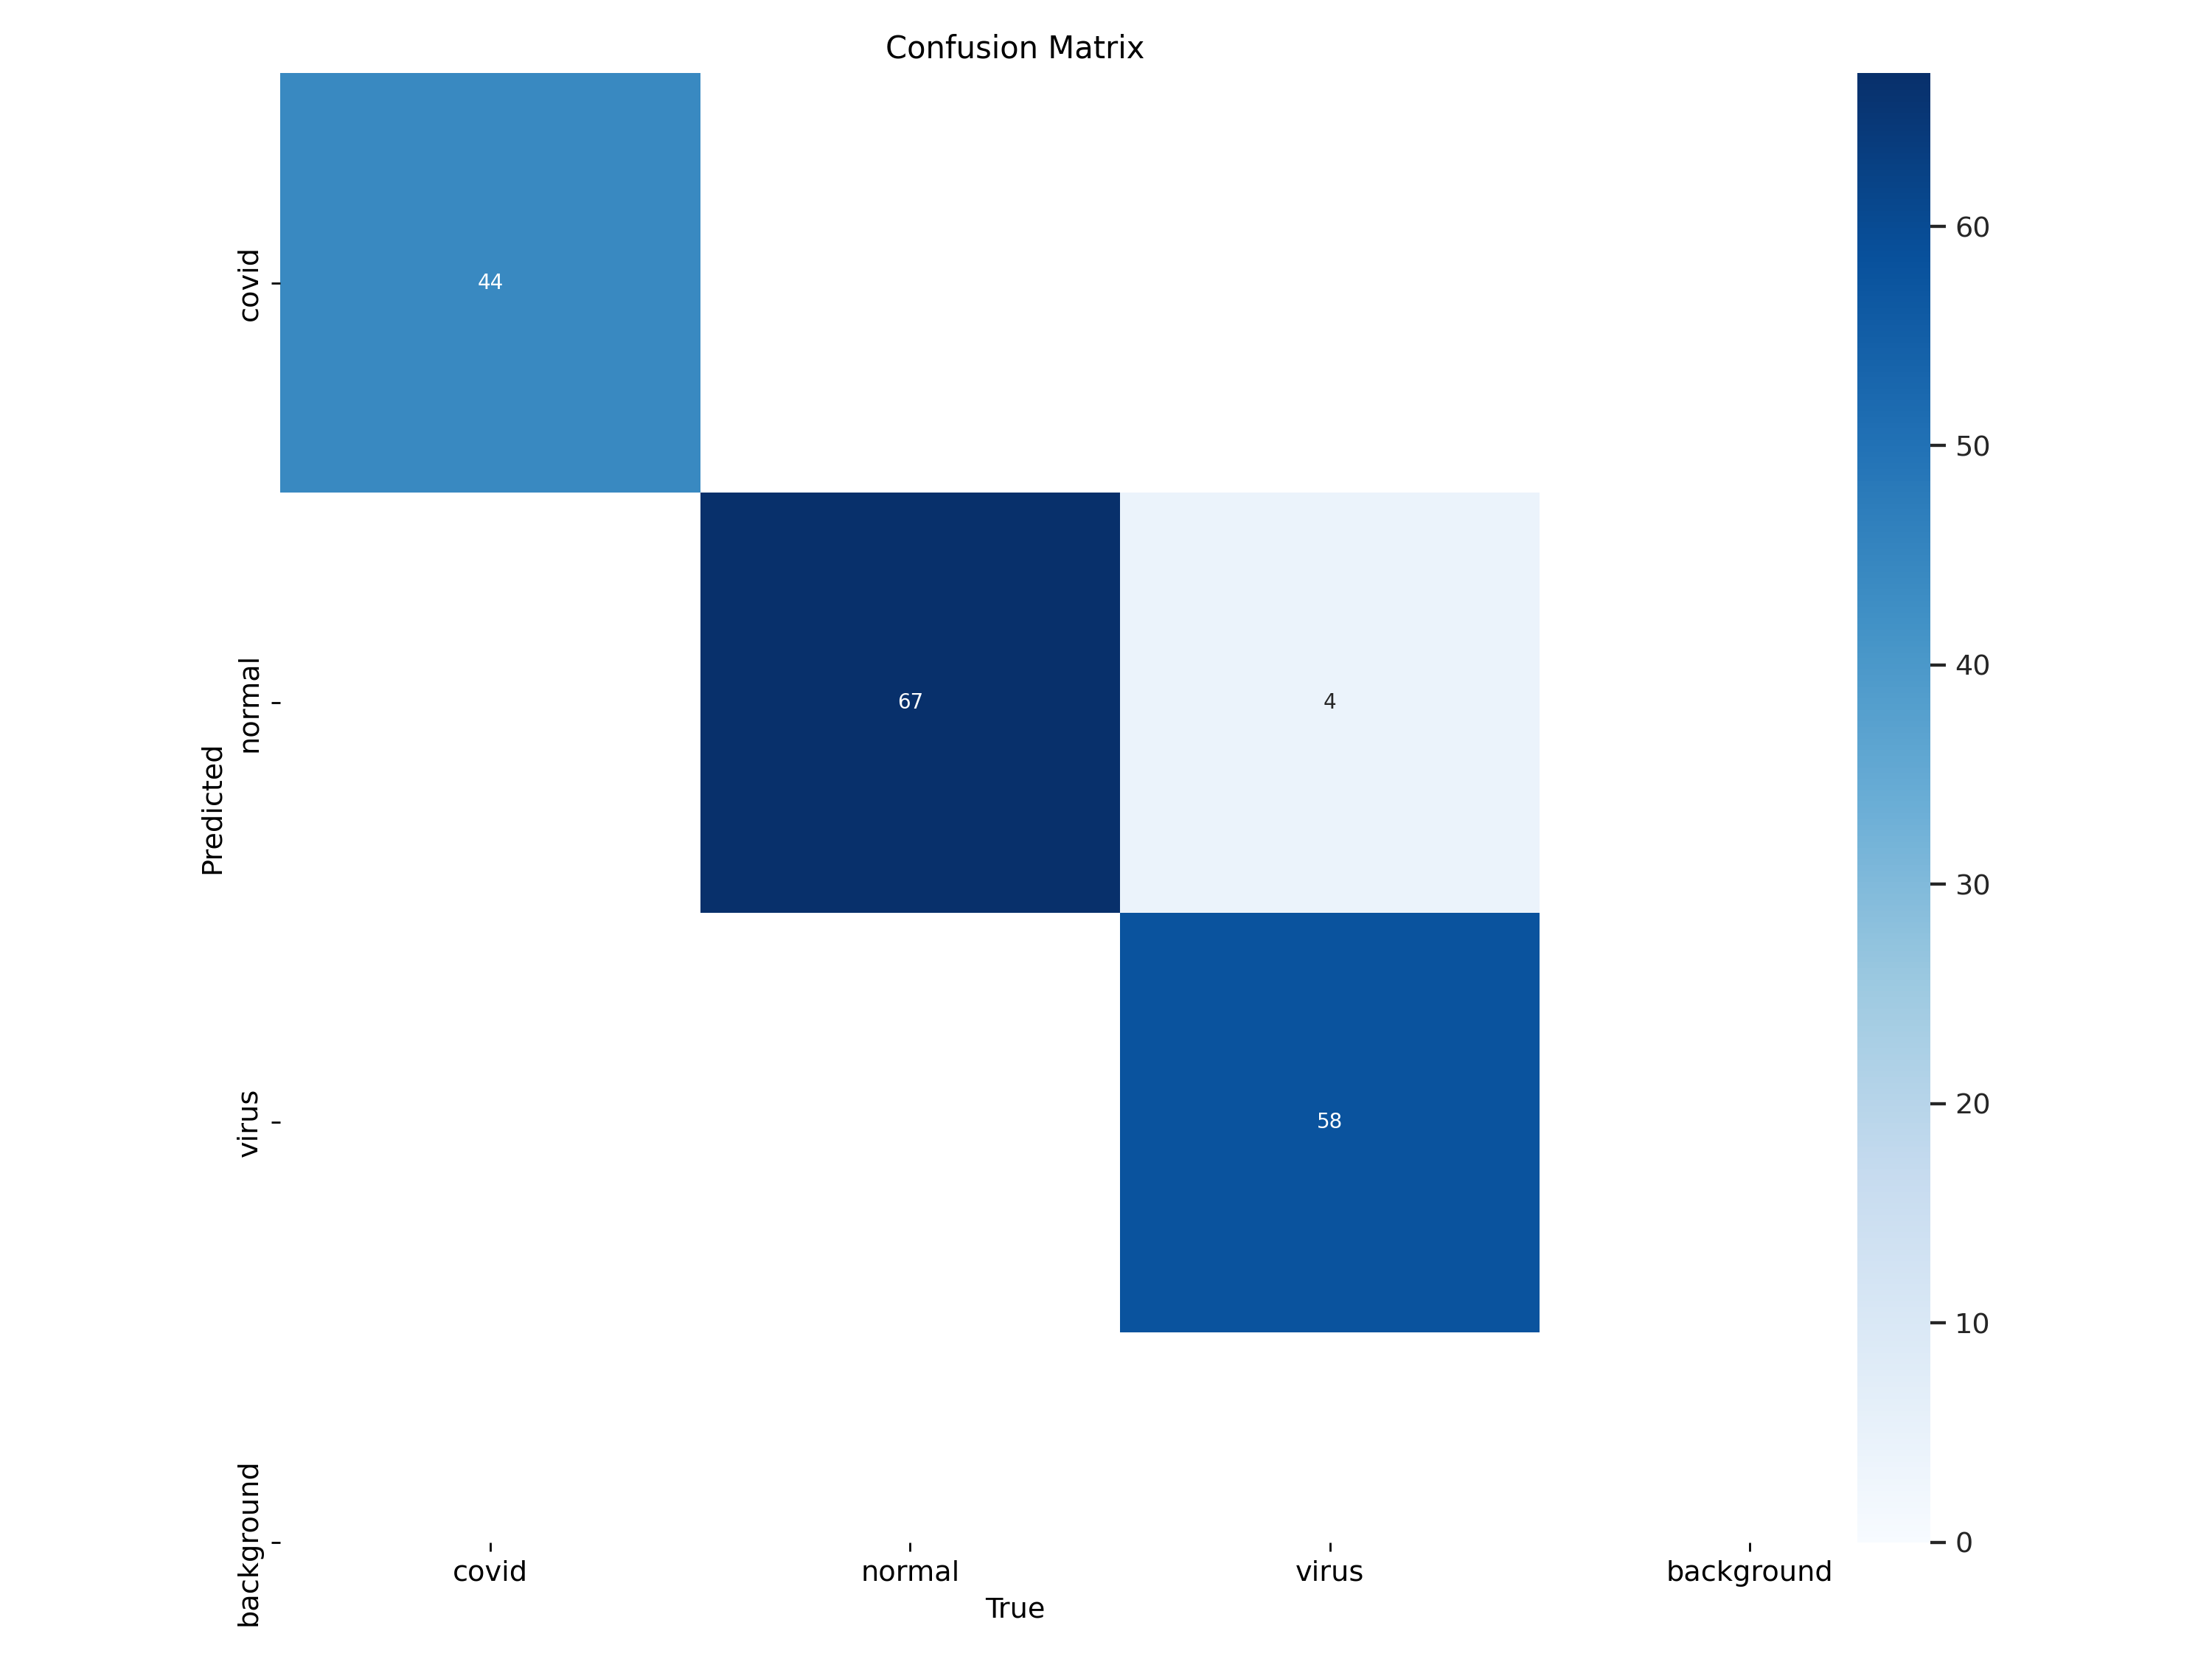

In [9]:
Image(filename='/kaggle/working/runs/classify/val/confusion_matrix.png')


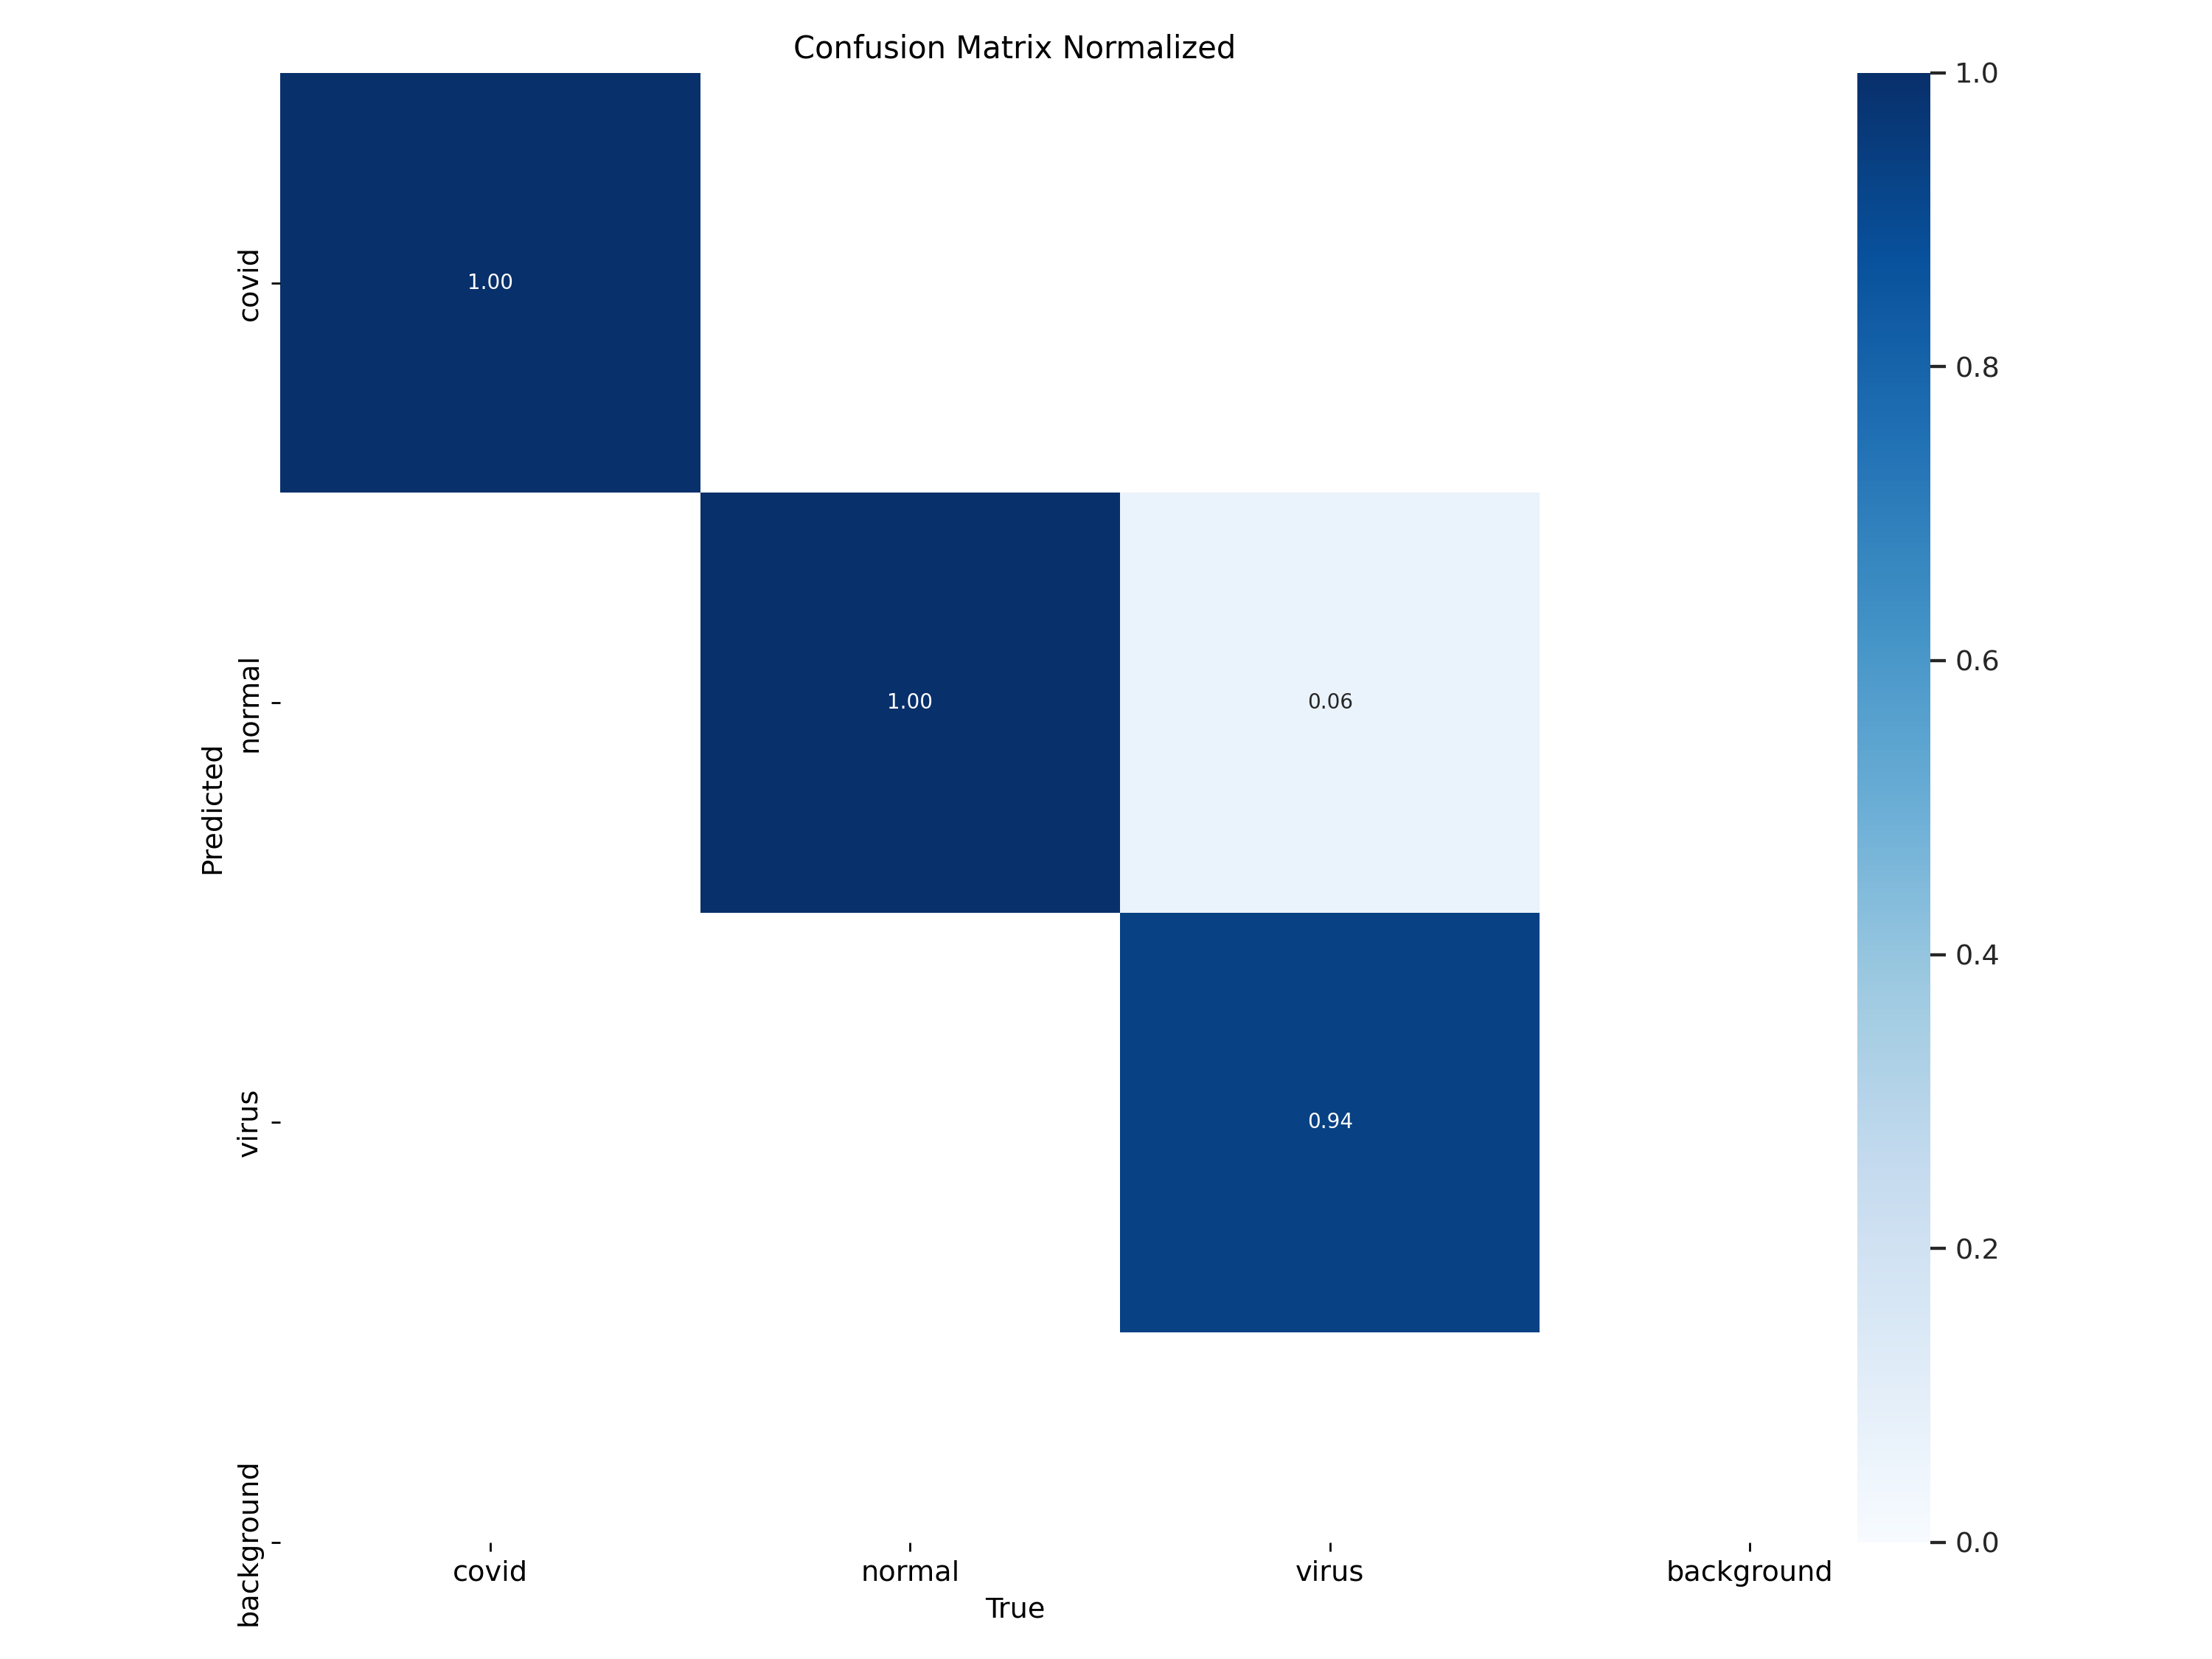

In [10]:
Image(filename='/kaggle/working/runs/classify/val/confusion_matrix_normalized.png')


In [11]:
# %cd /content/
!yolo export model=/kaggle/working/runs/classify/train/weights/best.pt format=onnx


Ultralytics YOLOv8.2.38 🚀 Python-3.10.13 torch-2.1.2 CPU (Intel Xeon 2.00GHz)
YOLOv8m-cls summary (fused): 103 layers, 15766499 parameters, 0 gradients, 41.6 GFLOPs

PyTorch: starting from '/kaggle/working/runs/classify/train/weights/best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 3) (30.2 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ✅ 0.9s, saved as '/kaggle/working/runs/classify/train/weights/best.onnx' (60.2 MB)

Export complete (3.3s)
Results saved to /kaggle/working/runs/classify/train/weights
Predict:         yolo predict task=classify model=/kaggle/working/runs/classify/train/weights/best.onnx imgsz=224  
Validate:        yolo val task=classify model=/kaggle/working/runs/classify/train/weights/best.onnx imgsz=224 data=/kaggle/working  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export


In [29]:
import os

def get_ground_truth_labels(img_path):
    # Example implementation assuming the image filename is the class label
    # You may need to adjust this based on your actual dataset structure
    return os.path.basename(img_path).split('.')[0]  # Assuming the filename is like 'class_name.jpg'


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Assume y_true and y_pred are your ground truth labels and model predictions respectively
# For example purposes, here are dummy variables
# You need to replace these with your actual ground truth and predictions
y_true = np.array([0, 1, 1, 0, 1, 1, 0])  # Ground truth labels
y_pred = np.array([0, 1, 0, 0, 1, 1, 1])  # Model predictions

# Calculate precision
precision = precision_score(y_true, y_pred)

# Calculate recall
recall = recall_score(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Assume y_true and y_pred are your ground truth labels and model predictions respectively
# For example purposes, here are dummy variables
# You need to replace these with your actual ground truth and predictions
y_true = np.array([0, 1, 1, 0, 1, 1, 0])  # Ground truth labels
y_pred = np.array([0, 1, 0, 0, 1, 1, 1])  # Model predictions

# Calculate precision
precision = precision_score(y_true, y_pred)

# Calculate recall
recall = recall_score(y_true, y_pred)

# Calculate F1 score
f1 = f1_score(y_true, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


In [26]:
validation_dir = '/kaggle/working/validation'
class_names = os.listdir(validation_dir)
class_dirs = [os.path.join(validation_dir, class_name) for class_name in class_names]
ground_truth = []

for i, class_dir in enumerate(class_dirs):
    class_name = class_names[i]
    files = os.listdir(class_dir)
    for file_name in files:
        # Assuming file_name is the image filename without extension
        ground_truth.append(class_name)


In [41]:
from ultralytics import YOLO

# Load the model
model = YOLO('/kaggle/working/runs/classify/train/weights/best.pt')

# Run inference on the validation set
val_results = model('validation/virus', save=True)



image 1/62 /kaggle/working/validation/virus/person105_virus_193.jpeg: 224x224 virus 1.00, covid 0.00, normal 0.00, 6.2ms
image 2/62 /kaggle/working/validation/virus/person115_virus_219.jpeg: 224x224 virus 1.00, normal 0.00, covid 0.00, 6.4ms
image 3/62 /kaggle/working/validation/virus/person1180_virus_2012.jpeg: 224x224 virus 1.00, normal 0.00, covid 0.00, 6.3ms
image 4/62 /kaggle/working/validation/virus/person1191_virus_2032.jpeg: 224x224 normal 0.97, virus 0.02, covid 0.01, 6.3ms
image 5/62 /kaggle/working/validation/virus/person1193_virus_2034.jpeg: 224x224 virus 1.00, normal 0.00, covid 0.00, 6.3ms
image 6/62 /kaggle/working/validation/virus/person11_virus_38.jpeg: 224x224 virus 0.56, normal 0.44, covid 0.00, 6.3ms
image 7/62 /kaggle/working/validation/virus/person1202_virus_2045.jpeg: 224x224 virus 1.00, normal 0.00, covid 0.00, 6.3ms
image 8/62 /kaggle/working/validation/virus/person1226_virus_2077.jpeg: 224x224 virus 1.00, normal 0.00, covid 0.00, 6.3ms
image 9/62 /kaggle/work